#  Classification Model Implementation

## Import libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  #To perform visualization
sns.set_style('whitegrid')

In [2]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## Read data

In [3]:
data = pd.read_csv("xAPI-Edu-Data.csv")

In [4]:
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [5]:
data.isna().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

## Drop unimportant features

In [6]:
data.drop(['NationalITy','PlaceofBirth','SectionID','Semester','Relation','AnnouncementsView',
           'ParentAnsweringSurvey', 'ParentschoolSatisfaction'],axis=1,inplace=True)

## Replace string values to integer 
#### since models will not work with string values, so that why we must replace them

In [7]:
label = {'M':0, 'F': 1}
data['gender'].replace(label,inplace=True)

In [8]:
label = {'lowerlevel':0, 'MiddleSchool': 1, 'HighSchool':2}
data['StageID'].replace(label,inplace=True)

In [9]:
label = {'G-01':0, 'G-02': 1, 'G-03':2, 'G-04':3, 'G-05': 4, 'G-06':5, 'G-07':6, 'G-08': 7, 'G-09':8,
        'G-10':9, 'G-11': 10, 'G-12':11}
data['GradeID'].replace(label,inplace=True)

In [10]:
label = {'English':0, 'Spanish': 1, 'French':2, 'Arabic':3, 'IT': 4, 'Math':5, 
         'Chemistry':6, 'Biology': 7, 'Science':8, 'History':9, 'Quran': 10, 'Geology':11}
data['Topic'].replace(label,inplace=True)

In [11]:
label = {'Under-7':0, 'Above-7': 1}
data['StudentAbsenceDays'].replace(label,inplace=True)

In [12]:
label = {'L':0, 'M': 1, 'H':2}
data['Class'].replace(label,inplace=True)

## Set the features

In [13]:
X = data.iloc[:,:-1]
X

,gender,StageID,GradeID,Topic,raisedhands,VisITedResources,Discussion,StudentAbsenceDays
0,0,0,3,4,15,16,20,0
1,0,0,3,4,20,20,25,0
2,0,0,3,4,10,7,30,1
3,0,0,3,4,30,25,35,1
4,0,0,3,4,40,50,50,1
...,...,...,...,...,...,...,...,...
475,1,1,7,6,5,4,8,1
476,1,1,7,11,50,77,28,0
477,1,1,7,11,55,74,29,0
478,1,1,7,9,30,17,57,1


## Set the label

In [14]:
y = data.iloc[:, -1].values

### Split data into 80% for training and 20% for testing

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Create Decision tree model and train it

In [16]:
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier(criterion = "entropy")
decision.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [17]:
decision_pred = decision.predict(X_test)

Desicion Tree

              precision    recall  f1-score   support

           0       0.73      0.73      0.73        26
           1       0.69      0.71      0.70        48
           2       0.67      0.64      0.65        22

    accuracy                           0.70        96
   macro avg       0.70      0.69      0.69        96
weighted avg       0.70      0.70      0.70        96





Text(0.5, 1.1, 'Confusion matrix')

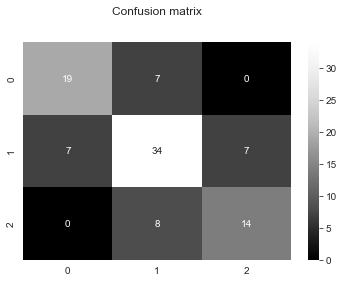

In [18]:
print('Desicion Tree' + '\n')
print(classification_report(y_test,decision_pred))
print('\n')
sns.heatmap(confusion_matrix(y_test,decision_pred),cmap='Greys_r',annot=True,fmt='g')
plt.title('Confusion matrix', y=1.1)

## Create K nearest neighbors model and train it

In [19]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=13, p = 2)
KNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=13)

In [20]:
KNN_pred = KNN.predict(X_test)

K Nearest Neighbours

              precision    recall  f1-score   support

           0       0.77      0.92      0.84        26
           1       0.74      0.71      0.72        48
           2       0.63      0.55      0.59        22

    accuracy                           0.73        96
   macro avg       0.71      0.73      0.72        96
weighted avg       0.72      0.73      0.72        96





<AxesSubplot:title={'center':'Confusion matrix'}>

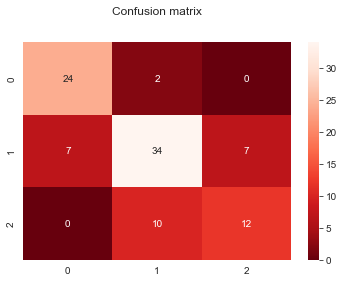

In [21]:
print('K Nearest Neighbours' + '\n')
print(classification_report(y_test,KNN_pred))
print('\n')
plt.title('Confusion matrix', y=1.1)
sns.heatmap(confusion_matrix(y_test,KNN_pred),cmap='Reds_r',annot=True,fmt='g')

## Create Logistic regression model and train it

In [22]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(X_train,y_train)

/Users/mohand/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
regressor_pred = regressor.predict(X_test)

Logistic Regression

              precision    recall  f1-score   support

           0       0.81      1.00      0.90        26
           1       0.86      0.75      0.80        48
           2       0.73      0.73      0.73        22

    accuracy                           0.81        96
   macro avg       0.80      0.83      0.81        96
weighted avg       0.82      0.81      0.81        96





<AxesSubplot:title={'center':'Confusion matrix'}>

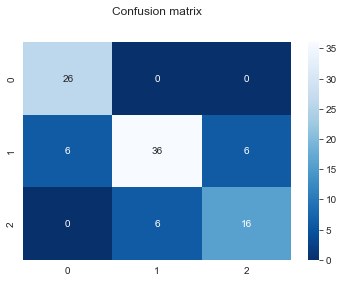

In [24]:
print('Logistic Regression' + '\n')
print(classification_report(y_test,regressor_pred))
print('\n')
plt.title('Confusion matrix', y=1.1)
sns.heatmap(confusion_matrix(y_test,regressor_pred),cmap='Blues_r',annot=True,fmt='g')